In [90]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.misc import imread, imsave
import matplotlib.pyplot as plt
from scipy.stats import norm

In [11]:
pics = []
for i in xrange(1,21):
    pic = imread("images/gray%d.png" % i, flatten=True)
    pics.append(pic)
pics = np.array(pics)
print pics.shape

(20, 790, 524)


In [14]:
aver_pic = np.zeros(pics[0].shape)
for pic in pics:
    aver_pic += pic
aver_pic /= len(pics)

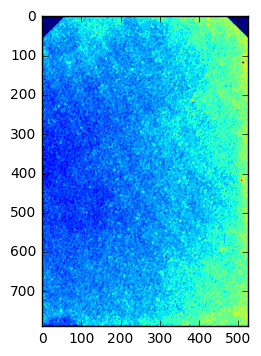

In [16]:
_ = plt.imshow(aver_pic)

Считаем, что aver_pic избавлен от аддитивного гауссовского шума

In [60]:
aver_pixel = np.mean(aver_pic)
sens = aver_pic / aver_pixel

inv_sens = np.ones(sens.shape)
inv_sens[sens == 0] = 0
sens[sens == 0] = 1
inv_sens = inv_sens / sens

for i in xrange(len(pics)):
    pics[i] *= inv_sens

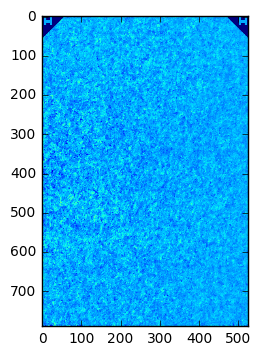

In [100]:
plt.imshow(pics[3])

In [96]:
aver_mean = 0
aver_std = 0
for pic in pics:
    aver_mean += pic.mean()
    aver_std += pic.std()

aver_mean /= len(pics)
aver_std /= len(pics)

print aver_mean, aver_std

78.4412059784 11.6517945766


In [2]:
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.random.normal(0, 10, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
plt.grid()
plt.show()

NameError: name 'fft' is not defined